In [2]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text
import requests
from bs4 import BeautifulSoup
import pandas as pd

from mplsoccer import Bumpy, FontManager, add_image

In [3]:
def get_soup(url):
    r = requests.get(url)
    r.encoding = 'unicode-escape'
    return BeautifulSoup(r.content, 'html.parser')

#Post Arsene Wenger Arsenal Football Club data since 2019
url_2019 = 'https://fbref.com/en/squads/18bb7c10/2019-2020/matchlogs/s3232/schedule/Arsenal-Scores-and-Fixtures-Premier-League'
url_2020 = 'https://fbref.com/en/squads/18bb7c10/2020-2021/matchlogs/s10728/schedule/Arsenal-Scores-and-Fixtures-Premier-League'
url_2021 = 'https://fbref.com/en/squads/18bb7c10/2021-2022/matchlogs/s11160/schedule/Arsenal-Scores-and-Fixtures-Premier-League'

soup_2019 = get_soup(url_2019)
df_2019 = pd.read_html(str(soup_2019.find_all('table')))[0]

soup_2020 = get_soup(url_2020)
df_2020 = pd.read_html(str(soup_2020.find_all('table')))[0]

soup_2021 = get_soup(url_2021)
df_2021 = pd.read_html(str(soup_2021.find_all('table')))[0]

# Stacking the datasets based on dates ascending 

In [4]:
df_2021.sort_values(by = ['Date'])
df_2021.dropna(subset = ['Result'], inplace = True) # Season 2021 is still continuing hence Nan entries are removed as the games havent been played yet

df_2020.sort_values(by = ['Date'], inplace = True)
df_2019.sort_values(by = ['Date'], inplace = True)
df_post_wenger = pd.concat([df_2019,df_2020,df_2021])
df_post_wenger.reset_index(inplace=True) #to remove recurring index after concatenating

In [5]:
def running_aggregates(df, clubname):
    df_club = df
             
    df_club['for_xG'] = 0.0
    df_club['against_xG'] = 0.0
    for i in range(len(df_club)):
        if (df_club.Venue[i] == 'Home'): 
            df_club['for_xG'][i] = df_club.xG[i]
            df_club['against_xG'][i] = df_club['xGA'][i]
        elif (df_club.Venue[i] == 'Away'):
            df_club['for_xG'][i] = df_club['xGA'][i]
            df_club['against_xG'][i] = df_club.xG[i]
    df_club[f'cumulative_for_xg_average_{clubname}'] = df_club.for_xG.rolling(10).mean()
    df_club[f'cumulative_against_xg_average_{clubname}'] = df_club.against_xG.rolling(10).mean()

    return df_club[['Round', f'cumulative_for_xg_average_{clubname}', f'cumulative_against_xg_average_{clubname}' ]]
        

# The running averages are set to 10 so the first 10 rows get invalid, for this we calculate a running average for the first 10 rows

## here is the code for calcualting moving averages using numpy

```
arr = np.arange(1,10,1);
i = 1;
moving_average = [];
arr_cumsum = np.cumsum(arr);
while i <= len(arr):
  window = round(arr_cumsum[i-1]/i , 2);
   moving_average.append(window);
   i = i + 1;
print(moving_average);
```


In [ ]:
df_post_wenger_xg_maps = running_aggregates(df_post_wenger, 'Arsenal')
df_post_wenger_xg_maps.fillna(0, inplace=True)

In [ ]:

first_10_rows = df_post_wenger.loc[:9][['for_xG','against_xG']].expanding().mean() 

for i in range(9):
    df_post_wenger_xg_maps['cumulative_for_xg_average_Arsenal'][i] = first_10_rows['for_xG'][i]
    df_post_wenger_xg_maps['cumulative_against_xg_average_Arsenal'][i] = first_10_rows['against_xG'][i]

In [8]:
df_post_wenger_xg_maps

,Round,cumulative_for_xg_average_Arsenal,cumulative_against_xg_average_Arsenal
0,Matchweek 1,0.50,1.000000
1,Matchweek 2,0.70,1.150000
2,Matchweek 3,1.30,1.066667
3,Matchweek 4,1.55,1.325000
4,Matchweek 5,1.80,1.240000
...,...,...,...
99,Matchweek 20,1.48,1.340000
100,Matchweek 28,1.52,1.360000
101,Matchweek 29,1.60,1.330000
102,Matchweek 27,1.38,1.380000


# Comapring Arsenal's GOAL threat against and from the teams they faced since 2019

In [9]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "static/Roboto-Regular.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                         "static/Roboto-Medium.ttf?raw=true"))
epl = Image.open(
    urlopen("https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/epl.png?raw=true"))

Arsenal_logo_url = ('https://upload.wikimedia.org/wikipedia/en/thumb/5/53/Arsenal_FC.svg/292px-Arsenal_FC.svg.png')
arsenal_logo = Image.open(urlopen(Arsenal_logo_url))



In [10]:
highlight_dict = {'cumulative_for_xg_average_Arsenal' : 'skyblue',
'cumulative_against_xg_average_Arsenal' : 'crimson'}

In [11]:
a = ['']*34; b = ['']*34; c = [''] * 34 # setting recurring x list to highlight different season
a[0] = 0 ;a[11] = 10 ;a[22] = 20; a[33] = 30
b[11] = 10; b[22] = 20; b[33] = 30
c[11] = 10; c[22] = 20; c[33] = 30

d = a + b + c


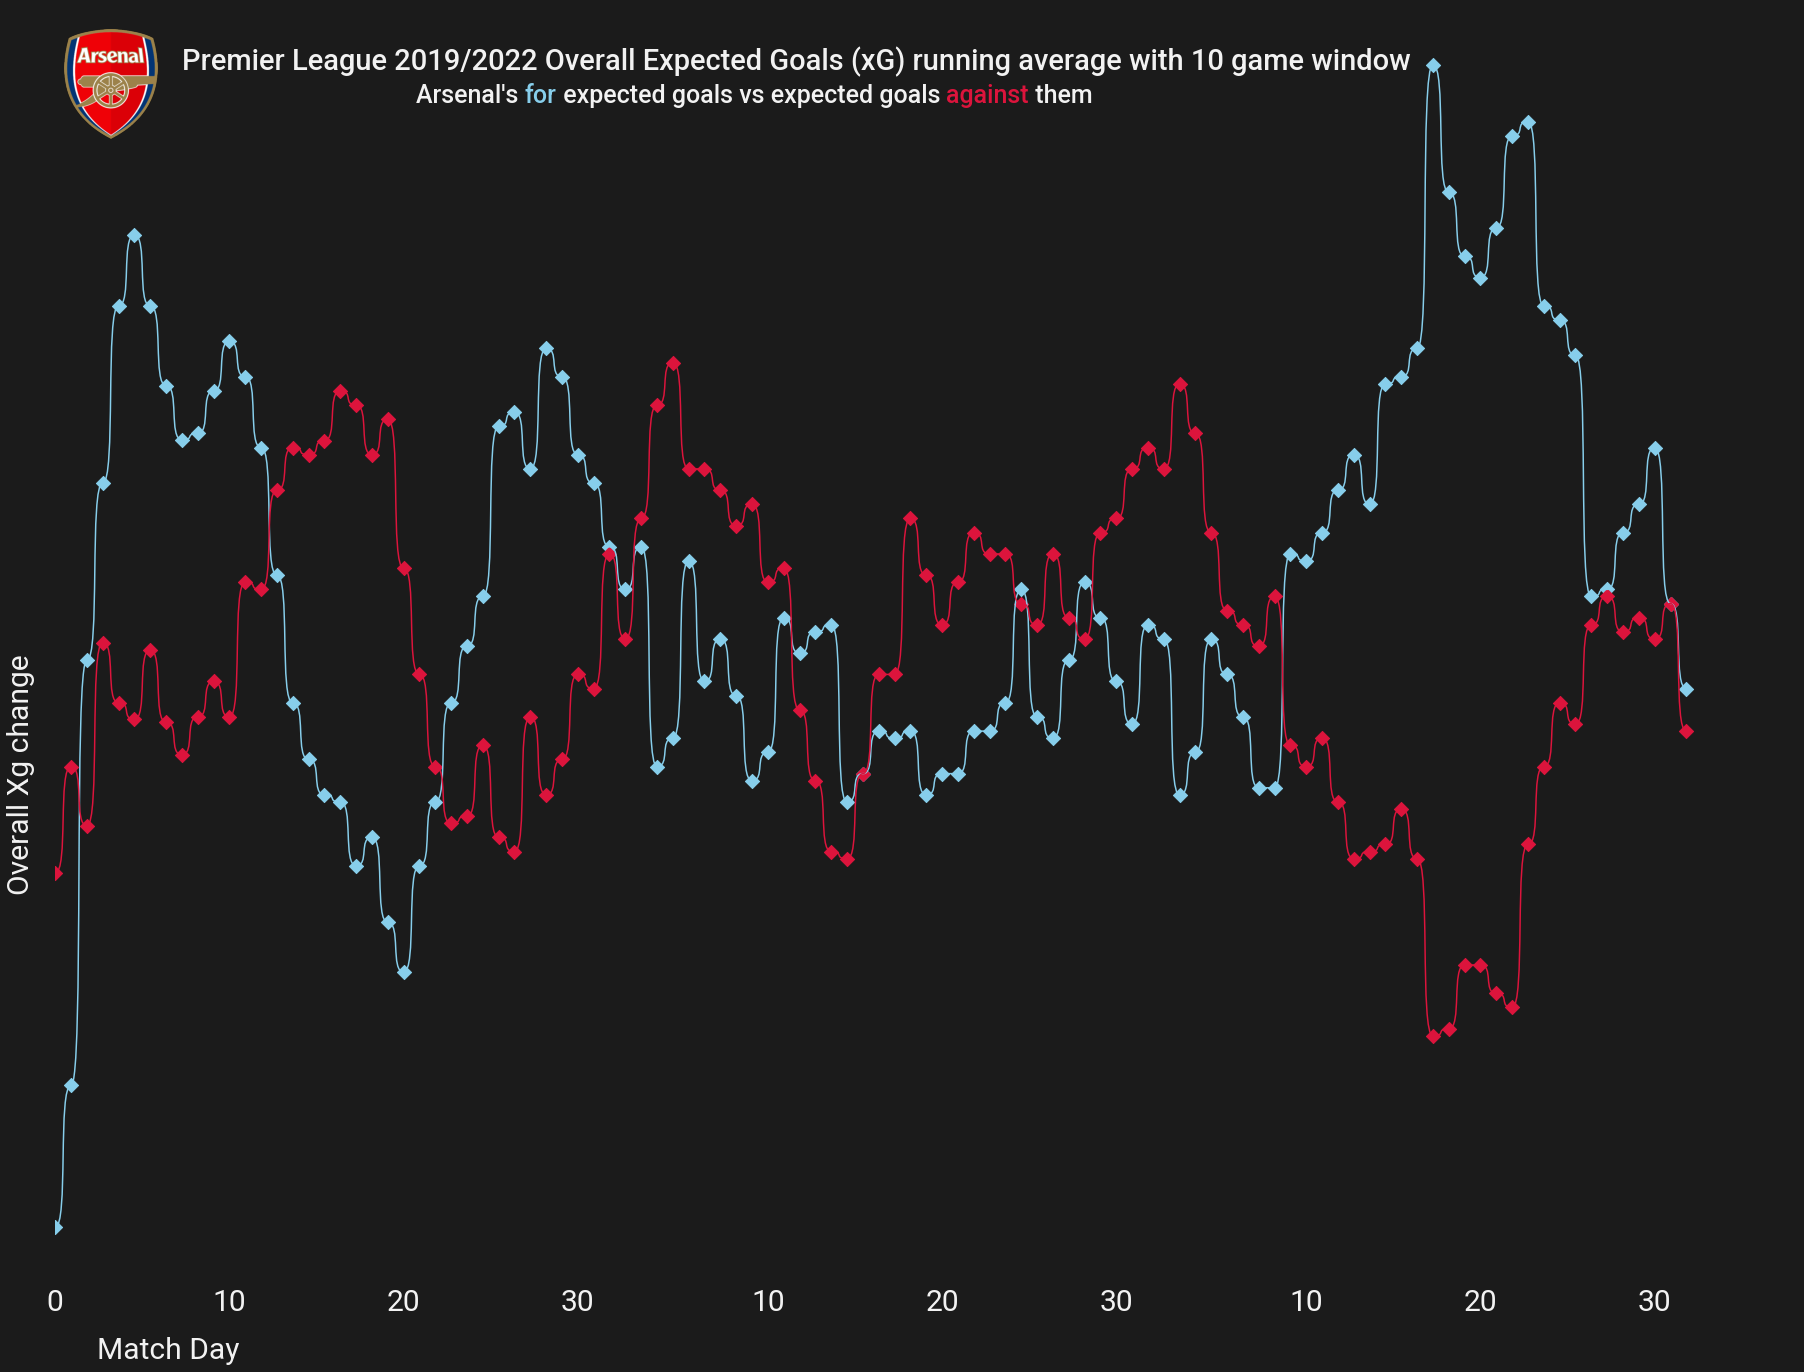

In [14]:
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=0,  # rotate x-ticks by 90 degrees
    ticklabel_size=30, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.4,  # y label alignment
    alignment_xvalue=0.065) # x label alignment

fig, ax = bumpy.plot(
    x_list=d,  # match-day or match-week
    y_list=np.linspace(0, 3,1).astype(int),  # position value from 1 to 20
    values=df_post_wenger_xg_maps.iloc[:,1:],  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(25, 19),  # size of the figure
    x_label='Match Day', y_label='Overall Xg change',  # label name
    ylim=(0, 3),
    xlim= (0,110),  # y-axis limit
    lw=1.5,
    upside_down=True,   # linewidth of the connecting lines
    fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)

TITLE = "Premier League 2019/2022 Overall Expected Goals (xG) running average with 10 game window"
SUB_TITLE = "Arsenal's <for> expected goals vs expected goals <against> them   "

fig_text( #add subtitles
    0.23, 0.94, SUB_TITLE, color="#F2F2F2",  
    highlight_textprops=[{"color": 'skyblue'}, {"color" : 'crimson'}],
    size=25, fig=fig, fontproperties=font_bold.prop 
)

#annotations


#ax.annotate('Arsenal bottom of the table\n After the first three games', xy = (2.0,0.8), xycoords = 'data', xytext = (2,20), textcoords = 'data', size = 20, va = 'center', ha = 'center', 
#arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3, rad=-0.2'),backgroundcolor = 'white' )


fig.text(0.10, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop) #add title

fig = add_image(
     arsenal_logo,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)



#fig = add_image(
#     arsenal_logo,
#     fig,  # figure
#     0.17, 0.9,  # left and bottom dimensions
#     0.08, 0.08  # height and width values
#)


# if space is left in the plot use this
plt.tight_layout(pad=0.5)
